In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

## `Problem 1 to 5`:

Dataset link: https://tinyurl.com/2fe6vz4u

**Add a label to every axis and add a proper title for the charts. Also add proper labels if there are multiple representations.** Then, you can customize it as your wish.

### **`Problem-1:`** Draw a line plot of which, the x-axis is the "Year" and the y-axis is sum of "PM2.5" of two countries Iran and China. 

In [2]:
df = pd.read_csv('https://tinyurl.com/2fe6vz4u')
df.head()

,Unnamed: 0,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
0,0,1,India,Kanpur,2016,173,>75%,319,NaN,2018
1,1,2,India,Faridabad,2016,172,>75%,316,NaN,2018
2,2,3,India,Gaya,2016,149,50% -< 75%,275,NaN,2018
3,3,4,India,Varanasi,2016,146,>75%,260,NaN,2018
4,4,5,India,Patna,2016,144,>75%,266,NaN,2018


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               500 non-null    int64 
 1   Position                 500 non-null    int64 
 2   Country                  500 non-null    object
 3   City/Town                500 non-null    object
 4   Year                     500 non-null    int64 
 5   PM2.5                    500 non-null    int64 
 6   Temporal coverage        86 non-null     object
 7   PM10                     500 non-null    int64 
 8   Temporal coverage.1      52 non-null     object
 9   Database version (year)  500 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 39.2+ KB


In [4]:
df.size

5000

In [5]:
iran_series=df.query('Country=="Iran"').groupby('Year')['PM2.5'].sum()
china_series=df.query('Country=="China"').groupby('Year')['PM2.5'].sum()

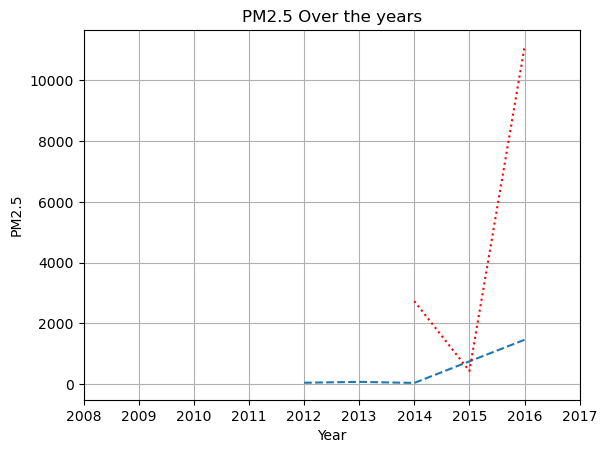

In [6]:
plt.plot(iran_series.index,iran_series.values,label='Iran',linestyle='dashed')
plt.plot(china_series.index,china_series.values,label='China',linestyle='dotted',color='red')
plt.xlabel('Year')
plt.ylabel('PM2.5')
plt.title('PM2.5 Over the years')
plt.xticks(df['Year'].value_counts().index)
plt.grid()
plt.show()

### **`Problem-2:`** Draw a histogram of the  column "PM10" of which the y-axis represents the probability (see the documentation how to draw the probability). 

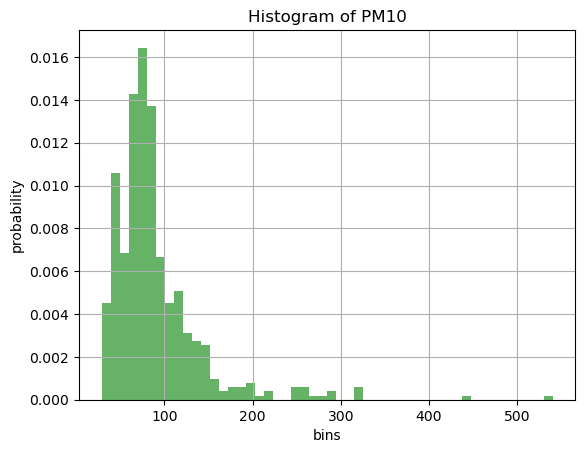

In [7]:
plt.hist(df['PM10'],density=True,bins=50,facecolor='green',alpha=0.6)
plt.xlabel('bins')
plt.ylabel('probability')
plt.title('Histogram of PM10')
plt.grid()
plt.show()

### **`Problem-3:`** Draw a scatter plot where x-axis represents "PM2.5" and y-axis represents "PM10" for two countries Poland and Chile.

In [8]:
poland_df=df.query("Country=='Poland'")
chile_df=df.query("Country=='Chile'")

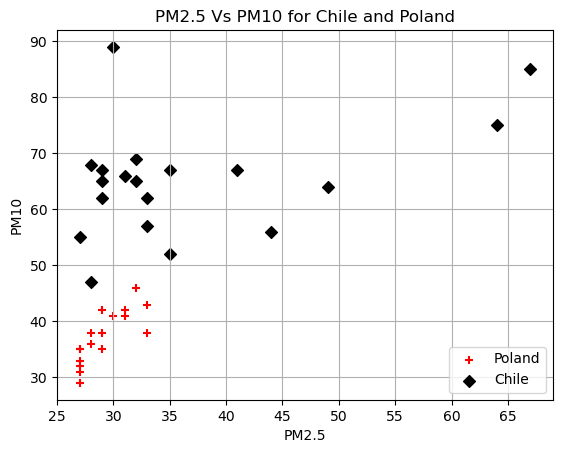

In [9]:
plt.scatter(poland_df['PM2.5'],poland_df['PM10'],marker='+',color='red',label='Poland')
plt.scatter(chile_df['PM2.5'],chile_df['PM10'],marker='D',color='black',label='Chile')
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.title('PM2.5 Vs PM10 for Chile and Poland')
plt.legend()
plt.grid()
plt.show()

### **`Problem-4:`** Draw a pie chart of top 5 most frequent countries.

In [10]:
freq_ser =df['Country'].value_counts().head()

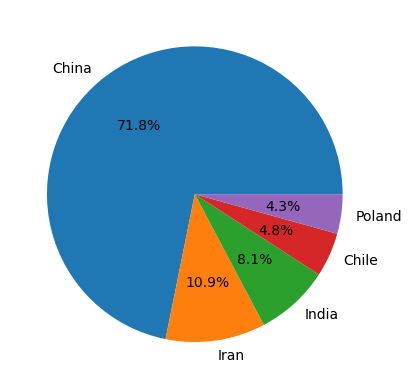

In [11]:
plt.pie(freq_ser,labels=freq_ser.index,autopct='%0.1f%%')
plt.show()

### **`Problem-5:`** Draw a bar chart which represents the counts of top 5 most frequent countries.


In [12]:
freq_ser.head()

China     283
Iran       43
India      32
Chile      19
Poland     17
Name: Country, dtype: int64

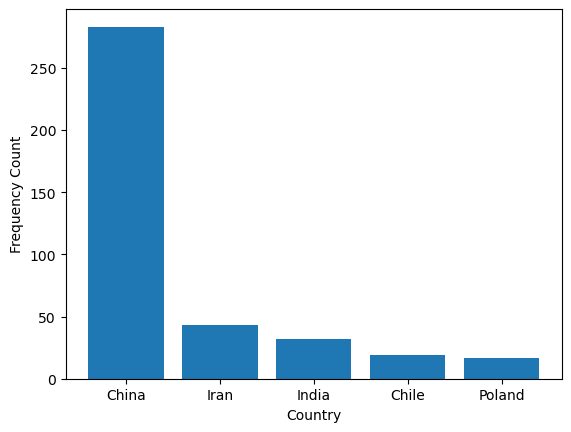

In [15]:
plt.bar(freq_ser.index,freq_ser)
plt.xlabel('Country')
plt.ylabel('Frequency Count')
plt.show()

## `Problem 6-10`
Data Set - https://docs.google.com/spreadsheets/d/e/2PACX-1vTJh6X4_mqixWsfK9mgkllGQkKYW9Wj9kOIMGY2uYsWeS8n5np87DO-SDGQWJ1HXEnxiOVFVzYFYEcR/pub?gid=558678488&single=true&output=csv

This is a Sales data of any company in a Year.


### `Problem-6`
Show a line plot of Total Profit for each month with below styling.
* Dotted Line
* Line Color Blue
* Show Legend at top left
* Circle Marker

In [16]:
df=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTJh6X4_mqixWsfK9mgkllGQkKYW9Wj9kOIMGY2uYsWeS8n5np87DO-SDGQWJ1HXEnxiOVFVzYFYEcR/pub?gid=558678488&single=true&output=csv')

In [17]:
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


In [18]:
df.shape[0]

12

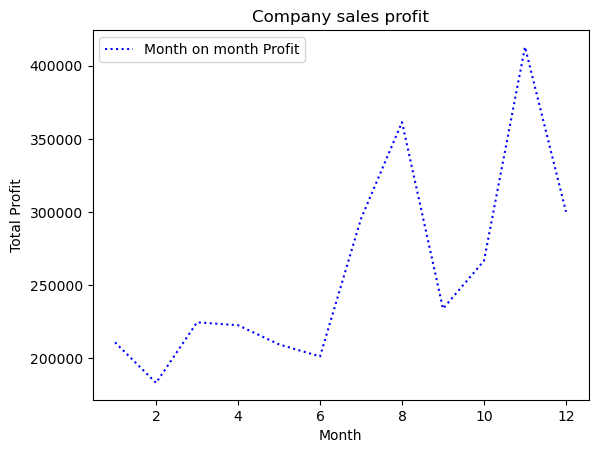

In [30]:
plt.plot(df['month_number'],df['total_profit'],label='Month on month Profit',color='b',linestyle='dotted')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.title('Company sales profit')
plt.legend(loc='upper left')
plt.show()

### `Problem-7` 
Show sales of each product in march month as pie chart. 
* Show Percentage value 
* Give Title "Sales in March"
* Explode ToothPaste with shadow

In [40]:
labels=df[df['month_number']==3].iloc[:,1:7].stack().index.get_level_values(1)

In [41]:
labels

Index(['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo',
       'moisturizer'],
      dtype='object')

In [42]:
values=df[df['month_number']==3].iloc[:,1:7].stack().values

In [43]:
values

array([2140, 1340, 4550, 9550, 3550, 1340], dtype=int64)

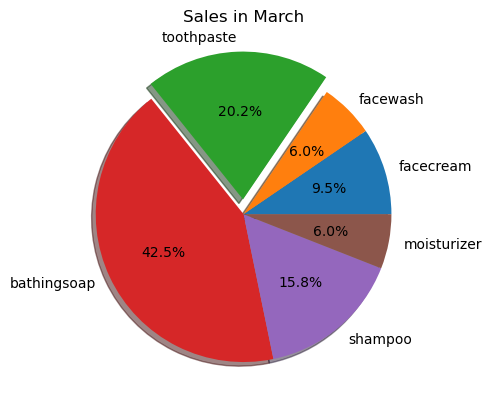

In [50]:
plt.pie(values,labels=labels,autopct='%0.1f%%',explode=[0,0,0.1,0,0,0],shadow=True)
plt.title('Sales in March')
plt.show()

### `Problem-8` Multiline Plot of all products sales.
* Give different styes for each products
* Add legend at top right

In [52]:
months_list=df['month_number'].to_list()

In [53]:
months_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

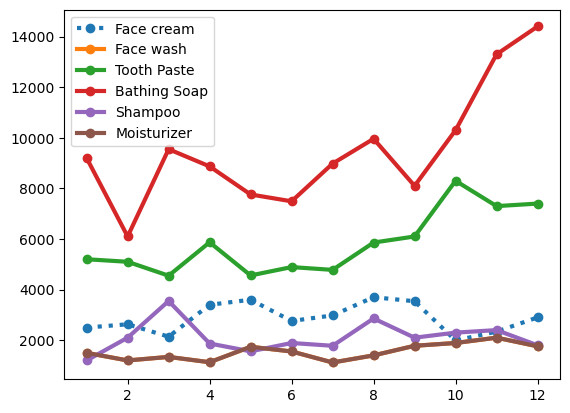

In [61]:
plt.plot(months_list,df['facecream'],label='Face cream',linestyle='dotted',marker='o',linewidth=3)
plt.plot(months_list,df['facewash'],label='Face wash',marker='o',linewidth=3)
plt.plot(months_list,df['toothpaste'],label='Tooth Paste',marker='o',linewidth=3)
plt.plot(months_list,df['bathingsoap'],label='Bathing Soap',marker='o',linewidth=3)
plt.plot(months_list,df['shampoo'],label='Shampoo',marker='o',linewidth=3)
plt.plot(months_list,df['moisturizer'],label='Moisturizer',marker='o',linewidth=3)
plt.legend()
plt.show()

### `Problem-9` Show Quarter wise Sales data for all products as multi Bar chart.

In [65]:
df['date']=pd.to_datetime(['2024-{}-01'.format(month) for month in df['month_number']])

In [66]:
df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit,date
0,1,2500,1500,5200,9200,1200,1500,21100,211000,2024-01-01
1,2,2630,1200,5100,6100,2100,1200,18330,183300,2024-02-01
2,3,2140,1340,4550,9550,3550,1340,22470,224700,2024-03-01
3,4,3400,1130,5870,8870,1870,1130,22270,222700,2024-04-01
4,5,3600,1740,4560,7760,1560,1740,20960,209600,2024-05-01
5,6,2760,1555,4890,7490,1890,1555,20140,201400,2024-06-01
6,7,2980,1120,4780,8980,1780,1120,29550,295500,2024-07-01
7,8,3700,1400,5860,9960,2860,1400,36140,361400,2024-08-01
8,9,3540,1780,6100,8100,2100,1780,23400,234000,2024-09-01
9,10,1990,1890,8300,10300,2300,1890,26670,266700,2024-10-01


In [71]:
final_df=df.groupby(df['date'].dt.quarter).sum()

C:\Users\khadarbasha\AppData\Local\Temp\ipykernel_22292\3095150444.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_df=df.groupby(df['date'].dt.quarter).sum()


In [72]:
final_df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
date,,,,,,,,,
1,6,7270,4040,14850,24850,6850,4040,61900,619000
2,15,9760,4425,15320,24120,5320,4425,63370,633700
3,24,10220,4300,16740,27040,6740,4300,89090,890900
4,33,7230,5750,23000,38000,6500,5750,97970,979700


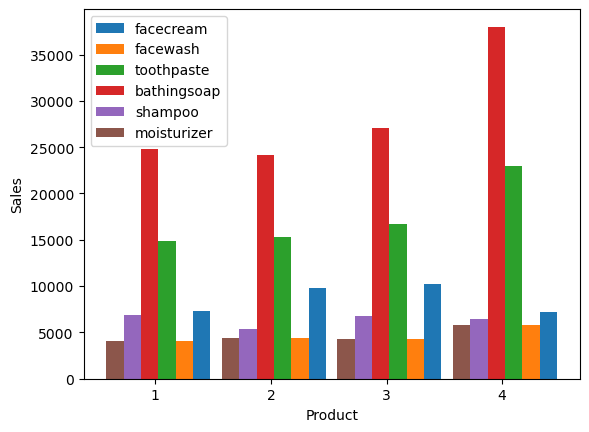

In [80]:
i = -1
for col in final_df.columns[1:7]:
    plt.bar(final_df.index+i,final_df[col],width=0.15,label=col)
    i = i-0.15

plt.xlabel('Product')
plt.ylabel('Sales')
plt.xticks(final_df.index-1.4,final_df.index)
plt.legend()
plt.show()

In [83]:
final_df.iloc[:,1:7]

,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
date,,,,,,
1,7270,4040,14850,24850,6850,4040
2,9760,4425,15320,24120,5320,4425
3,10220,4300,16740,27040,6740,4300
4,7230,5750,23000,38000,6500,5750


### `Problem-10` Plot Stacked Bar chart quarter wise for each product.

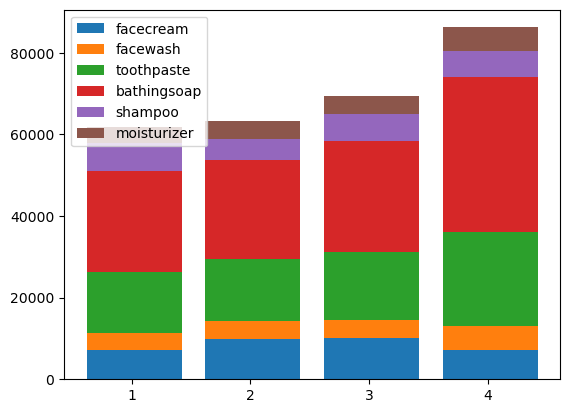

In [92]:
all_cols=[]

for col in final_df.columns[1:7]:
    if len(all_cols)==0:
        plt.bar(final_df.index,final_df[col],label=col)
    else:
         plt.bar(final_df.index,final_df[col],bottom=sum(all_cols),label=col)
    all_cols.append(final_df[col])

plt.xticks(final_df.index - 0.02,final_df.index)
plt.legend()
plt.show()
    